# Unsupervised Learning with k-Means Clustering

Clustering is an unsupervised learning method for grouping data into clusters to detect similarities. k-means is a popular method for performing clustering and is implemented in Scikit's [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class. Let's explore k-means clustering using Scikit. Start by importing Matplotlib and Seaborn in order to dress up your visualizations.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Use Scikit's [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function to generate some data points loosely grouped into four clusters.

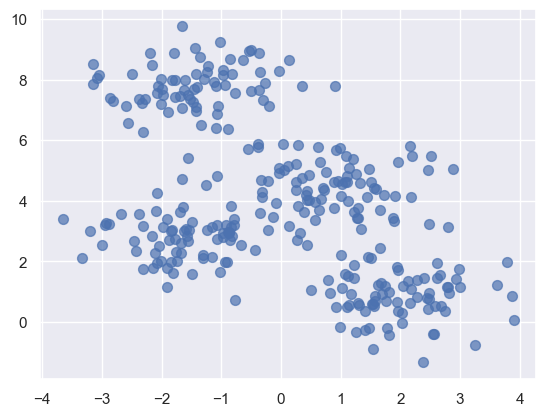

In [6]:
from sklearn.datasets import make_blobs

points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
 
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)

Now use `KMeans` to group the data points into three clusters. In this scenario, calling `predict()` on the `KMeans` object returns values from 0 to 2 representing cluster numbers.

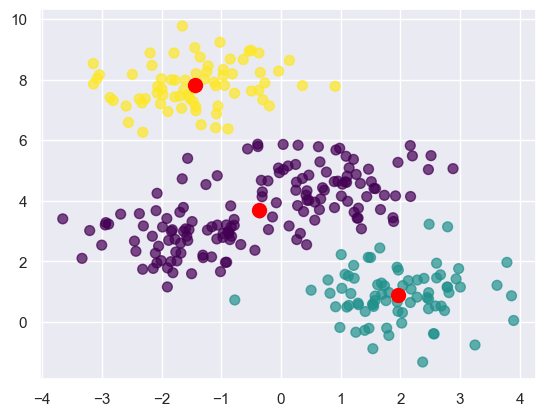

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

How would it look if you used four clusters instead?

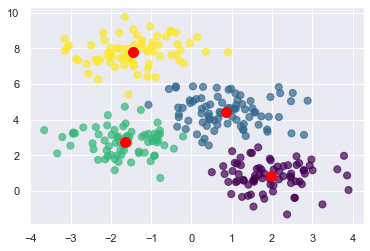

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Here's how it looks with five clusters:

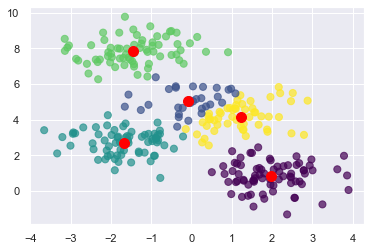

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

How do you determine the "right" number of clusters? One way to do it is with the elbow method, which plots "inertias" (the sum of the squared distances of the data points to the closest cluster center) obtained from `KMeans.inertia_` as a function of cluster counts:

Text(0, 0.5, 'Inertia')

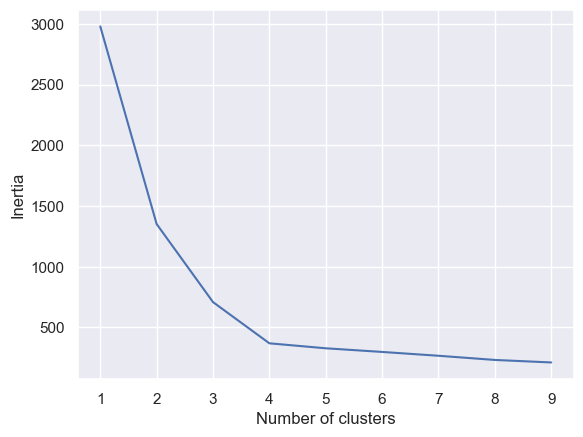

In [9]:
inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

From the graph, it appears that the "right" number of clusters is 4, so let's go back to that model:

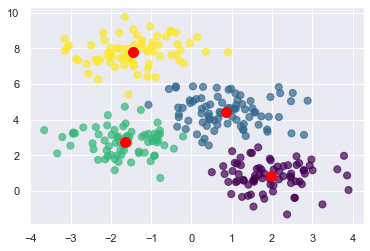

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Add a new data point to the mix.

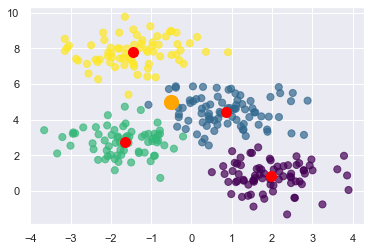

In [8]:
import numpy as np

point = np.array([[-0.5, 5]])
px = point[:, 0]
py = point[:, 1]

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
plt.scatter(px, py, c='orange', s=200)

Which cluster does the data point belong to?

In [9]:
cluster = kmeans.predict(point)[0]
print(cluster)

1


Which cluster is that? To answer that question, color all the points in the corresponding cluster red.

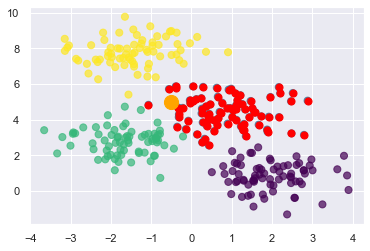

In [10]:
r = points[predicted_cluster_indexes==cluster]

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.scatter(r[:, 0], r[:, 1], c='red', s=50)
plt.scatter(px, py, c='orange', s=200)

Show the distance from the point to each center.

In [11]:
d = []
for i in range(len(centers)):
    d.append(np.sqrt((px - centers[i][0])**2 + (py - centers[i][1])**2))

print(d)

[array([4.8470332]), array([1.46570934]), array([2.52147763]), array([2.93542029])]


Does it make sense now that `KMeans` assigned the point to the cluster whose index is 1?

## Use k-means to segment customers on two attributes

Now let's use k-means clustering to tackle a real-world problem: segmenting customers based on customer data to identify which customers to target with a campaign for a new product or a promotion to increase their purchasing activity. The dataset is a customer-segmentation dataset available from Kaggle.com. Start by using Pandas to load the dataset.

In [12]:
import pandas as pd

customers = pd.read_csv('Data/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


How many rows and columns does the dataset contain?

In [13]:
customers.shape

(200, 5)

Perform a quick check to make sure there are no missing values.

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Extract the annual-income and spending-score values and plot them to see how they relate.

Text(0, 0.5, 'Spending Score')

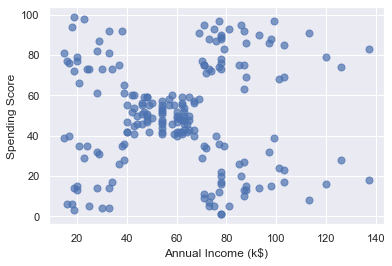

In [15]:
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

Use the elbow method to determine the optimum number of clusters.

Text(0, 0.5, 'Inertia')

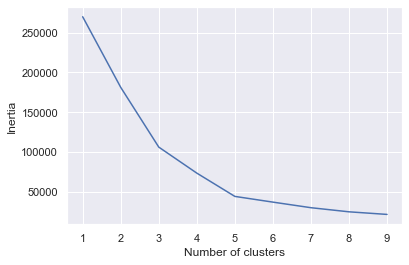

In [16]:
inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looks as if the optimum number of clusters is 5. Therefore, segment the customers using five clusters.

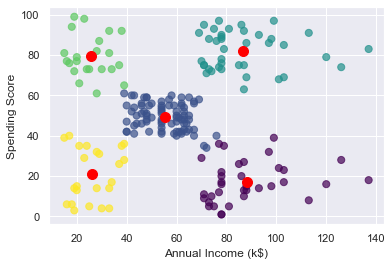

In [17]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Create a DataFrame containing customer data and add a column named "Cluster" with the index of the cluster that each customer falls into.

In [18]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Generate a list of customers who fall into the lower-right cluster (customers with high incomes but low spending scores).

In [19]:
# Get the cluster index for a customer with a high income and low spending score
cluster = kmeans.predict(np.array([[120, 20]]))[0]
 
# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]
 
# Show the customer IDs
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199], dtype=int64)

These might be great customers to target with a promotion to entice them to buy more of your product. If you were going to roll out a loyalty program instead to reward customers who already buy your product, which cluster (or clusters) would you target?

## Segment customers on all attributes

Now segment the customers again, this time using everything except the customer IDs. Start by replacing the strings "Male" and "Female" in the "Gender" column with 1s and 0s, a process known as *label encoding*. This is necessary because machine learning can only deal with numerical data.

In [20]:
from sklearn.preprocessing import LabelEncoder
 
df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Extract the values in the gender, age, income, and score columns, and use the elbow method to determine the optimum number of clusters based on these features.

Text(0, 0.5, 'Inertia')

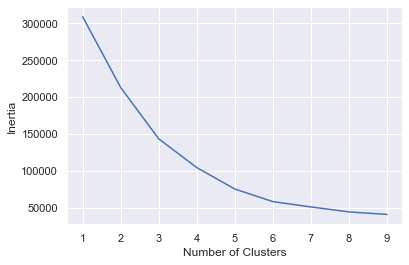

In [21]:
inertias = []
points = df.iloc[:, 1:5].values

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

The elbow is less distinct this time, but let's segment the customers into five clusters again and add a column named "Cluster" with the index of the cluster that each customer falls into.

In [22]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


You have a cluster number for each customer, but what does it mean? You can’t plot gender, age, annual income, and spending score in a 2-dimensional chart the way you plotted annual income and spending score in the previous example. But you *can* get the mean (average) of these values for each cluster from the cluster centroids. Create a new DataFrame with columns for average age, average income, and so on, and then show the results.

In [23]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]    # Average age for current cluster
    income = center[2] # Average income for current cluster
    spend = center[3]  # Average spending score for current cluster

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]
    
    results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


Based on this, if you were going to target customers with high incomes but low spending scores for a promotion, which group of customers (which cluster) would you choose? Would it matter whether you targeted males or females?